<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/Clustering_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

JPEG
(850, 1511)
RGB


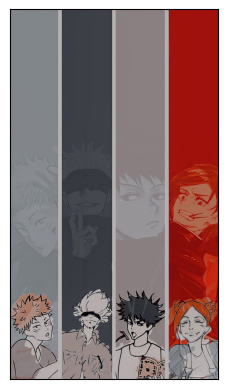

In [ ]:
ruta='/content/drive/MyDrive/MachineLearning/Images/'
img="jjk_lines.jpg"
imagen = Image.open(ruta + img)

# summarize some details about the image
print(imagen.format)
print(imagen.size)
print(imagen.mode)
fig = plt.imshow(imagen)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


In [ ]:
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(imagen)

# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)
reshaped_array=numpydata.reshape((imagen.size[0]*imagen.size[1],3))
print(reshaped_array.shape)

<class 'numpy.ndarray'>
(1511, 850, 3)
(1284350, 3)


In [ ]:
centros=[2,3,4,5,6,7,8,9,10,11,12]
inercia=[]
silhouette_avg=[]
df = pd.DataFrame(reshaped_array, columns=['R', 'G', 'B'])
muestra=df.sample(frac =.05)
muestra

,R,G,B
257428,161,18,14
1159053,21,15,15
109930,60,63,70
638315,172,106,80
132877,60,63,70
...,...,...,...
931025,56,59,66
751864,150,148,151
669686,175,105,80
132874,60,63,70


In [ ]:
for i in centros:
  kmeans= KMeans(n_clusters=i, random_state=0, n_init="auto")
  kmeans.fit(muestra)
  inercia.append(kmeans.inertia_)
  score = silhouette_score(muestra, kmeans.fit_predict(muestra) )
  silhouette_avg.append(score)
  print(i)

2
3
4
5
6
7
8
9
10
11
12


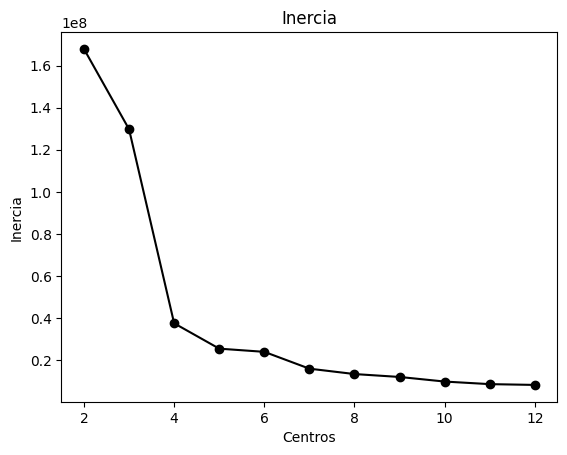

In [ ]:
plt.plot(centros,inercia,c='black')
plt.scatter(centros,inercia,c='black')
plt.title("Inercia")
plt.xlabel("Centros")
plt.ylabel("Inercia")
plt.show()

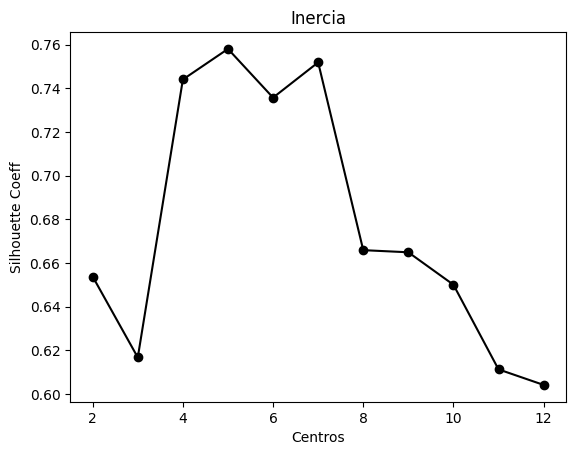

In [ ]:
plt.plot(centros,silhouette_avg,c='black')
plt.scatter(centros,silhouette_avg,c='black')
plt.title("Inercia")
plt.xlabel("Centros")
plt.ylabel("Silhouette Coeff")
plt.show()

In [ ]:
n_colors=4
kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init="auto")
kmeans.fit(reshaped_array)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [ ]:
images=[]
n=int(imagen.size[1]/n_colors)
for center in kmeans.cluster_centers_:
    original_array=np.array(center, np.uint8)
    cloned_array = np.repeat(original_array, 2*n*n, axis=0)
    matrix = cloned_array.reshape((3, 2*n*n)).T
    matrix=matrix.reshape((2*n,n,3))
    pilImage = Image.fromarray(matrix)
    images.append(pilImage)

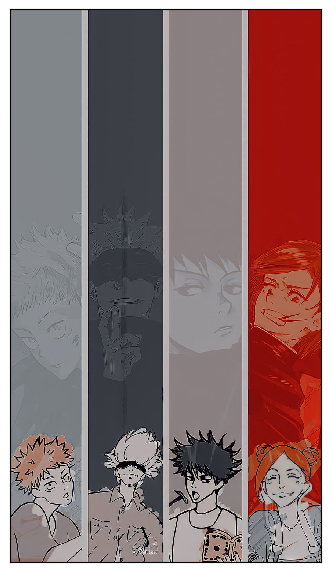

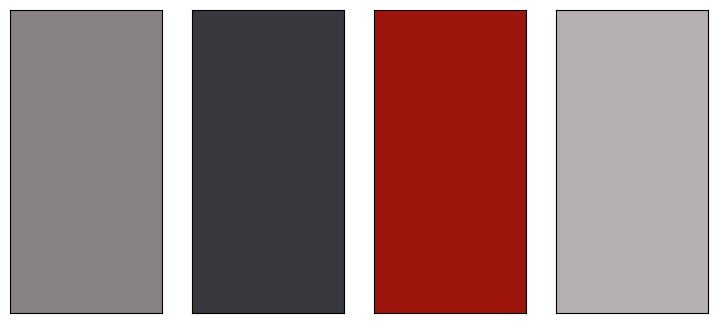

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7.18))
ax.imshow(imagen, interpolation='nearest')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Create a figure with a 1xn_colors subplot layout
fig, axes = plt.subplots(1, n_colors, figsize=(9, 7.18))

# Iterate over the n images and display them in the subplots
for i, image in enumerate(images):
    ax = axes[i]
    ax.imshow(image, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

# Display the figure
plt.show()

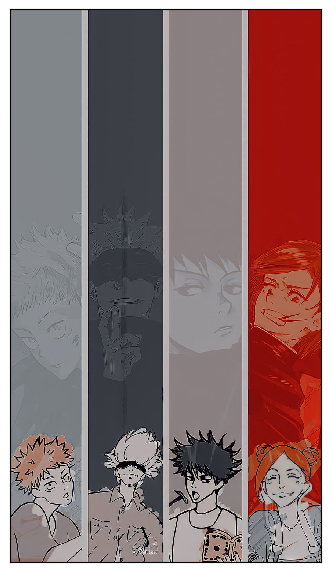

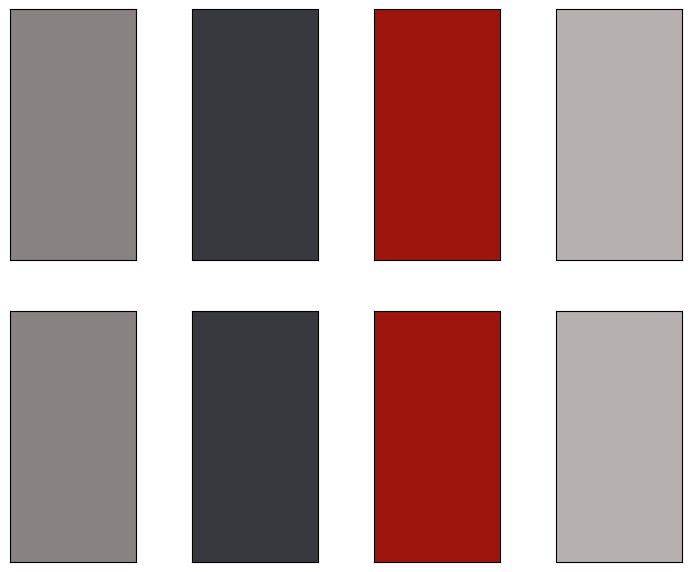

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7.18))
ax.imshow(imagen, interpolation='nearest')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Create a figure with a 1xn_colors subplot layout
fig, axes = plt.subplots(2, n_colors, figsize=(9, 7.18))
for j in range (0,2):
  if j==0:
    ax = axes[j,i]
    ax.imshow(imagen,interpolation='nearest')
  # Iterate over the n images and display them in the subplots
  for i, image in enumerate(images):
      ax = axes[j,i]
      ax.imshow(image, interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])

  # Display the figure
plt.show()

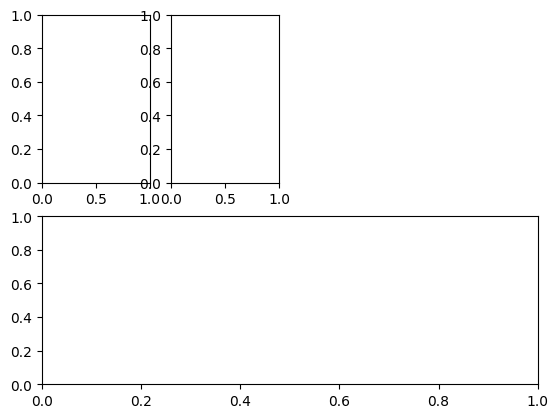

In [ ]:
fig = plt.figure()

gs = fig.add_gridspec(2,n_colors)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

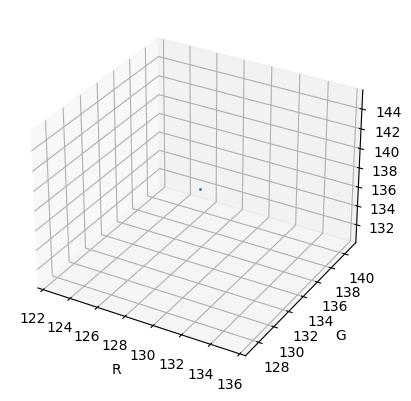

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs=np.array(reshaped_array.T[0][250000])
ys=np.array(reshaped_array.T[1][250000])
zs=np.array(reshaped_array.T[2][250000])
ax.scatter(xs,ys,zs, marker=m,s=1)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [ ]:
def sacar_colores(ruta_de_imagen,numero_de_colores):
  ruta='/content/drive/MyDrive/MachineLearning/Images/'
  ruta_de_imagen="jjk_lines.jpg"
  imagen = Image.open(ruta + ruta_de_imagen)
  reshaped_array=asarray(imagen).reshape((imagen.size[0]*imagen.size[1],3))
  n_colors=numero_de_colores
  kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init="auto")
  kmeans.fit(reshaped_array)
  images=[]
  n=int(imagen.size[1]/n_colors)
  for center in kmeans.cluster_centers_:
      original_array=np.array(center, np.uint8)
      cloned_array = np.repeat(original_array, 2*n*n, axis=0)
      matrix = cloned_array.reshape((3, 2*n*n)).T
      matrix=matrix.reshape((2*n,n,3))
      pilImage = Image.fromarray(matrix)
      images.append(pilImage)
  fig = plt.imshow(imagen)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  # Create a figure with a 1xn_colors subplot layout
  fig, axes = plt.subplots(1, n_colors, figsize=(4, 12))

  # Iterate over the n images and display them in the subplots
  for i, image in enumerate(images):
      ax = axes[i]
      ax.imshow(image, interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])

  # Display the figure
  plt.show()

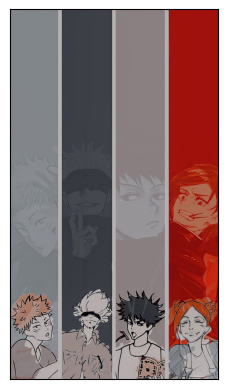

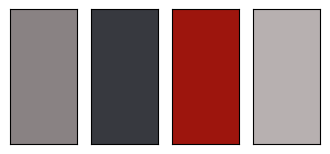

In [ ]:
sacar_colores("jjk_lines.jpg",4)

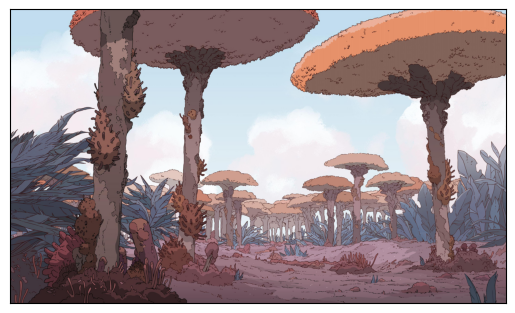

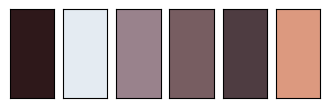

In [214]:
sacar_colores("scavengers reign.jpg",6)

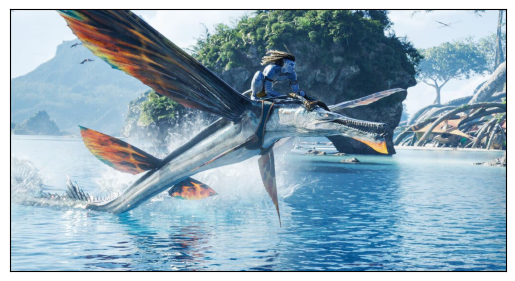

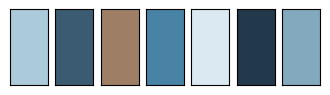

In [215]:
sacar_colores("avatar_movie.jpg",7)

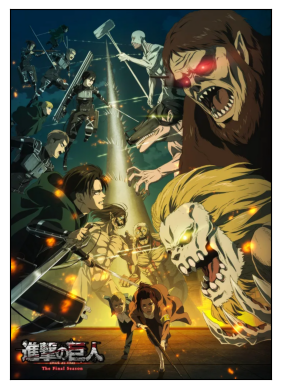

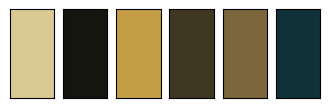

In [216]:
sacar_colores("aot_wallpaper.webp",6)

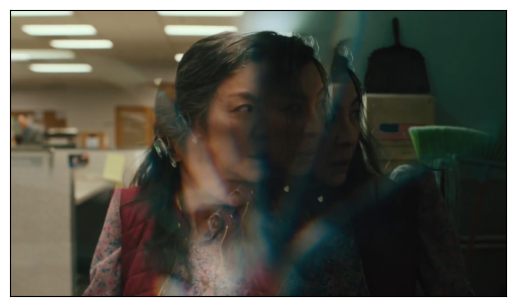

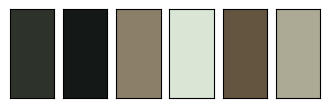

In [217]:
sacar_colores("World-Building-Cinematography-of-Everything.jpg",6)

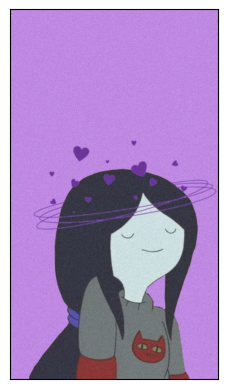

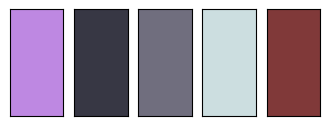

In [220]:
sacar_colores("marceline.jpg",5)

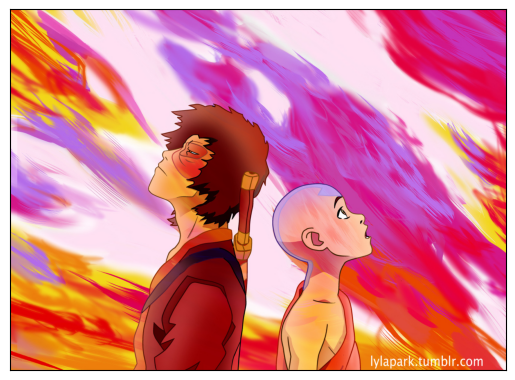

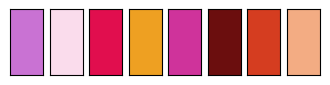

In [221]:
sacar_colores("dancing_dragon.jpg",8)

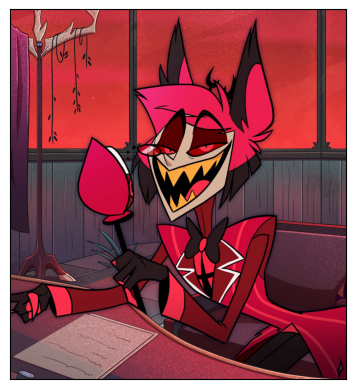

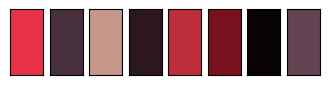

In [223]:
sacar_colores("Alastor.png",8)

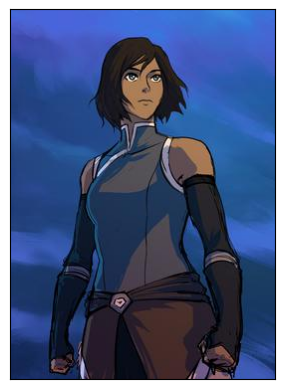

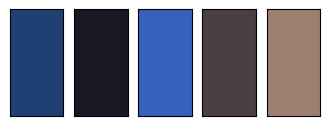

In [231]:
sacar_colores("korraa.jpg",5)

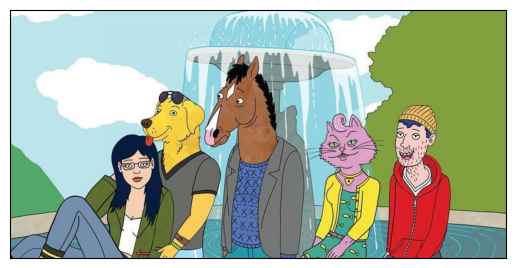

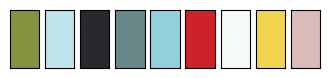

In [239]:
sacar_colores("BH_character.jpg",9)

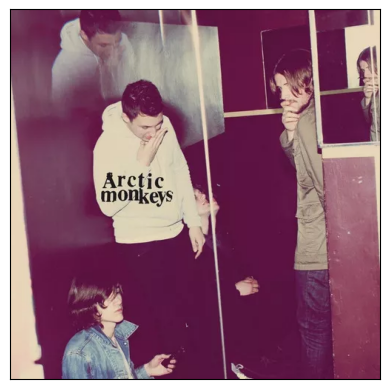

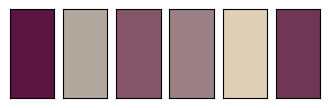

In [243]:
sacar_colores("Arctic Monkeys Humbug.webp",6)

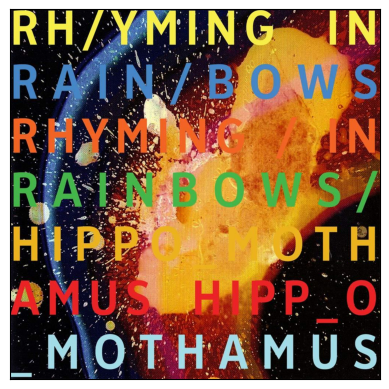

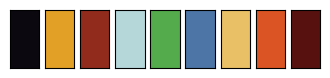

In [247]:
sacar_colores("In Rainbows.jpg",9)

In [ ]:
sacar_colores("",9)